# Initial Data Cleaning

Objective:

- Clean location, salary, titles 
- Make sure data size is large enough
- Clean JD 
    - Remove stop words
    - basic tokenization
    - get most frequently used words
    - create bigrams, or ngrams, or bag or words
    - count vectorization

In [1]:
import time
import nltk
from nltk.corpus import stopwords

from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.collocations import *
import string, re

from gensim.models import Word2Vec

from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0)

### Concat all jobs together

In [96]:
import time, glob

#Iterate through list of filenames and read each in
outfilename = 'all_' + str((int(time.time()))) + ".csv"

filenames = glob.glob('*.csv')

import shutil

with open(outfilename, 'wb') as outfile:
    for filename in glob.glob('*.csv'):
        if filename == outfilename:
            # don't want to copy the output into the output
            continue
        with open(filename, 'rb') as readfile:
            shutil.copyfileobj(readfile, outfile)


In [55]:
outfile

<_io.BufferedWriter name='all_1589642043.csv'>

In [2]:
df = pd.read_csv('all_1589665998.csv', encoding='latin-1')

In [3]:
df.head()

,Unnamed: 0,Title,Company,Location,Link,Review,Salary,Description
0,0.0,Data Scientist,Lockheed Martin,"Arlington, VA",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,4,None,Description:Are you ready to take your career ...
1,1.0,Support Scientist Ocean Data Assimilation (HAFS),IMSG/NOAA,"Arlington, VA",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,None,None,"Overview I.M. Systems Group, Inc. (IMSG) is se..."
2,2.0,"2021048 Data Scientist $215,000.00",B4CORP,"Arlington, VA",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,None,"Up to $215,000 a year",Position Requires a Top Secret (TS/SCI) Cleara...
3,3.0,Senior Data Engineer - Data Quality and Monito...,Freddie Mac,"Arlington, VA",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,3.8,None,Are you passionate to work with the most valua...
4,4.0,Chief Scientist Machine Learning,Leidos,"Arlington, VA",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,3.7,None,Description\rJob Description:\rThe Leidos Arti...


In [4]:
df = df.drop('Unnamed: 0', axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12155 entries, 0 to 12154
Data columns (total 7 columns):
Title          12155 non-null object
Company        12151 non-null object
Location       12155 non-null object
Link           12155 non-null object
Review         12155 non-null object
Salary         12155 non-null object
Description    12155 non-null object
dtypes: object(7)
memory usage: 664.9+ KB


#### Remove Duplicates

In [6]:
df2 = df.drop_duplicates(subset='Link', keep = 'first', inplace = False)

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7066 entries, 0 to 12034
Data columns (total 7 columns):
Title          7066 non-null object
Company        7064 non-null object
Location       7066 non-null object
Link           7066 non-null object
Review         7066 non-null object
Salary         7066 non-null object
Description    7066 non-null object
dtypes: object(7)
memory usage: 441.6+ KB


In [8]:
df2.groupby('Location').count().sort_values(by='Salary', ascending=True);

In [9]:
def rename_location(x):
    if "New York" in x:
        y = "New York, NY"
    else: 
        y = x
    return y

In [10]:
df2['Location2'] = df2['Location'].apply(rename_location)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
df2.to_csv("job_data_1.csv")

In [12]:
df2 = pd.read_csv("job_data_1.csv")

In [13]:
df2.Salary.unique()

array(['None', 'Up to $215,000 a year', '$60,000 a year',
       '$20 - $25 an hour', '$70,000 - $85,000 a year',
       '$45 - $55 an hour', '$102,663 - $157,709 a year',
       '$40 - $60 an hour', '$21.93 - $26.43 an hour',
       '$40,000 - $60,000 a year', '$82,326 - $105,339 a year',
       '$45 an hour', '$1,200 - $4,200 a month',
       '$100,000 - $150,000 a year', '$140,000 - $175,000 a year',
       '$67,968 - $126,062 a year', '$75 - $100 an hour',
       '$121,316 - $157,709 a year', '$72,030 - $137,012 a year',
       'Up to $125,000 a year', '$1,000 a month', '$130,000 a year',
       '$27.17 - $36.60 an hour', '$120,000 - $170,000 a year',
       'Up to $100,000 a year', '$120,000 - $150,000 a year',
       '$40,000 - $50,000 a year', '$190,000 a year', '$20 - $27 an hour',
       '$50 - $55 an hour', '$100,000 - $145,000 a year',
       '$160,000 - $175,000 a year', '$70,000 - $80,000 a year',
       '$85,000 - $165,000 a year', '$145,000 - $165,000 a year',
       '$1

#### Subset dataframe with Salary info

In [14]:
salary_df = df2[df2['Salary']!= 'None'].drop(['Location','Unnamed: 0'], axis = 1)

In [15]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1162 entries, 2 to 7261
Data columns (total 7 columns):
Title          981 non-null object
Company        964 non-null object
Link           964 non-null object
Review         964 non-null object
Salary         964 non-null object
Description    964 non-null object
Location2      959 non-null object
dtypes: object(7)
memory usage: 72.6+ KB


We have 964 jobs with salary info. Let's look at their titles.

In [16]:
salary_list = salary_df['Salary'].unique().tolist()

##### Adjust Hourly and Daily Salary to Yearly

In [17]:
def salary_base(x):
    y=""
    if "year" in str(x):
        y = "Yearly"
    if "hour" in str(x):
        y = "Hourly"
    if "day" in str(x):
        y = "Daily"
    elif "month" in str(x):
        y = "Monthly"
    
    return y
        

In [18]:
salary_df['Rate_by'] = salary_df['Salary'].apply(salary_base)

In [19]:
salary_df = salary_df[salary_df['Rate_by']!=""]

In [20]:
indexNames = salary_df[salary_df['Rate_by']==""].index
 
# Delete these row indexes from dataFrame
salary_df.drop(indexNames , inplace=True)

In [21]:
salary_df.reset_index(drop=True);

In [22]:
salary_df.groupby('Rate_by').Salary.count()

Rate_by
Daily        1
Hourly     294
Monthly     31
Yearly     637
Name: Salary, dtype: int64

#### Split the cell and use regular expression to identify only numbers.

In [23]:
a = "From $69,415 a year" 


pattern = '\$[0-9]*[.,]?[0-9]*'
p = re.compile(pattern)
digits = p.findall(a)
digits

['$69,415']

In [24]:
salary_list;

In [25]:
salary_df[['low','high']] = salary_df.Salary.str.split('-', expand=True)

In [26]:
salary_df[['Rate_by','low','high']]

,Rate_by,low,high
2,Yearly,"Up to $215,000 a year",None
6,Yearly,"$60,000 a year",None
8,Hourly,$20,$25 an hour
11,Yearly,"$70,000","$85,000 a year"
16,Hourly,$45,$55 an hour
...,...,...,...
7192,Yearly,"$108,000","$118,000 a year"
7199,Yearly,"$89,000","$99,000 a year"
7208,Yearly,"$89,000","$99,000 a year"
7212,Yearly,"$80,000","$90,000 a year"


In [27]:
def find_salary(a):
    if a:
        pattern = '\$[0-9]*[.,]?[0-9]*'
        p = re.compile(pattern)
        digits = p.findall(a)
        new1 = digits[0].replace("$","")
        new2 = new1.replace(",","")
        
        return float(new2)
    else:
        return 0

In [28]:
salary_df['min'] = salary_df['low'].apply(find_salary)

In [29]:
salary_df['max'] = salary_df['high'].apply(find_salary)

In [30]:
salary_df.head();

In [31]:
salary_df.to_csv("salary_df_5.20.csv")

#### Calculate the adjusted salary (turn all daily/hourly wage to yearly), use average

In [32]:
#Calculate average salary
def adjust_salary(a, b):
    adjusted_salary=[]
    for x, y in zip(a,b):
        if y > 0:
            avg_salary = (x+y)/2
        
        else:
            avg_salary = x
            
        adjusted_salary.append(avg_salary)
        
    return adjusted_salary               

In [33]:
salary_df['adjusted_salary'] = adjust_salary(salary_df['min'], salary_df['max'])

In [34]:
#turn hourly, daily and monthly wage to yearly 
def adjust_salary2(m,n):
    adjusted_yearly_salary = []
    for x, y in zip(m,n):
        if x == "Yearly":
            yearly_salary = y
        if x == "Monthly":
            yearly_salary = y*12
        if x == "Hourly":
            yearly_salary = y*40*52
        if x == "Daily":
            yearly_salary = y*5*52
            
        adjusted_yearly_salary.append(yearly_salary)
        
    return adjusted_yearly_salary
        

In [35]:
salary_df['adjusted_yearly_salary'] = adjust_salary2(salary_df['Rate_by'], salary_df['adjusted_salary'])

In [50]:
salary_df.Location2.unique()

array(['Arlington, VA', 'Atlanta, GA', nan, 'Austin, TX', 'Boston, MA',
       'Cambridge, MA', 'Charlotte, NC', 'Chicago, IL', 'Dallas, TX',
       'Denver, CO', 'Hartford, CT', 'Houston, TX', 'Irving, TX',
       'Los Angeles, CA', 'Miami, FL ', 'New York, NY', 'Palo Alto, CA',
       'Philadelphia, PA', 'Pittsburg, PA', 'Portland, OR',
       'Raleigh-Durham, NC', 'San Antonio, TX', 'San Francisco, CA',
       'San Jose, CA', 'Seattle, WA', 'Washington, DC'], dtype=object)

#### Join with Cost of Living Index

In [2]:
COI = pd.read_excel("CostofLiving2020.xlsx")

In [3]:
COI.head()

,Rank,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,"New York, NY",100.00,100.00,100.00,100.00,100.00,100.00
1,2,"San Francisco, CA",91.51,115.58,103.02,86.91,94.45,135.90
2,3,"Palo Alto, CA",91.51,115.58,103.02,86.91,94.45,135.90
3,4,"Anchorage, AK",91.36,38.94,66.29,88.42,78.89,118.44
4,5,"Honolulu, HI",89.70,63.03,76.94,89.83,83.60,88.29


In [4]:
COI.City.unique()

array(['New York, NY', 'San Francisco, CA', 'Palo Alto, CA',
       'Anchorage, AK', 'Honolulu, HI', 'Brooklyn, NY', 'Washington, DC',
       'Oakland, CA', 'Seattle, WA', 'Boston, MA', 'Cambridge, MA',
       'Bellevue, WA', 'Chicago, IL', 'Sarasota, FL', 'Philadelphia, PA',
       'San Jose, CA', 'Portland, OR', 'Toronto, Canada',
       'New Orleans, LA', 'Sacramento, CA', 'Minneapolis, MN',
       'Los Angeles, CA', 'Albany, NY', 'Jacksonville, FL',
       'Baltimore, MD', 'San Diego, CA', 'Miami, FL', 'Buffalo, NY',
       'Vancouver, Canada', 'Atlanta, GA', 'Reno, NV', 'Pittsburgh, PA',
       'Pittsburg, PA', 'Denver, CO', 'Nashville, TN', 'Arlington, VA',
       'Charlotte, NC', 'Halifax, Canada', 'Tucson, AZ', 'Olympia, WA',
       'Victoria, Canada', 'Colorado Springs, CO', 'Tacoma, WA',
       'Saint Louis, MO', 'Calgary, Canada', 'Columbus, OH',
       "Saint John's, Canada", 'Raleigh-Durham, NC', 'Edmonton, Canada',
       'Saskatoon, Canada', 'Kansas City, MO', 'Ottawa, C

In [5]:
salary_df = pd.read_csv("salary_final.csv")

In [6]:
df = salary_df.merge(COI, left_on='Location2', right_on='City', how = 'left')

In [7]:
df.groupby('Location2')['Local Purchasing Power Index'].mean()

Location2
Arlington, VA         114.082286
Atlanta, GA           140.470000
Austin, TX            145.760000
Boston, MA            112.390000
Cambridge, MA         112.390000
Charlotte, NC         144.290000
Chicago, IL           113.520000
Dallas, TX            155.300000
Denver, CO            130.330000
Hartford, CT                 NaN
Houston, TX           141.310000
Irving, TX            137.300000
Los Angeles, CA       113.780000
Miami, FL                    NaN
New York, NY          100.000000
Palo Alto, CA         135.900000
Philadelphia, PA      100.230000
Pittsburg, PA         123.080000
Portland, OR          112.820000
Raleigh-Durham, NC    145.300000
San Antonio, TX       116.400000
San Francisco, CA     135.900000
San Jose, CA          143.480000
Seattle, WA           133.430000
Washington, DC        130.250000
Name: Local Purchasing Power Index, dtype: float64

In [10]:
df.head()

,Unnamed: 0,Title,Company,Link,Review,Salary,Description,Location2,Rate_by,low,...,adjusted_salary,adjusted_yearly_salary,Rank,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,2,"2021048 Data Scientist $215,000.00",B4CORP,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,None,"Up to $215,000 a year",Position Requires a Top Secret (TS/SCI) Cleara...,"Arlington, VA",Yearly,"Up to $215,000 a year",...,215000.0,215000.0,36.0,"Arlington, VA",80.159143,58.838571,69.961143,76.886286,78.608571,115.594571
1,2,"2021048 Data Scientist $215,000.00",B4CORP,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,None,"Up to $215,000 a year",Position Requires a Top Secret (TS/SCI) Cleara...,"Arlington, VA",Yearly,"Up to $215,000 a year",...,215000.0,215000.0,61.0,"Arlington, VA",67.200000,33.880000,51.260000,59.130000,76.440000,112.570000
2,6,Data Science/Data Analyst,CRAiC LLC,https://www.indeed.com/company/CRAiC-LLC/jobs/...,None,"$60,000 a year",Cost Readiness Analytics (CRAiC LLC) is lookin...,"Arlington, VA",Yearly,"$60,000 a year",...,60000.0,60000.0,36.0,"Arlington, VA",80.159143,58.838571,69.961143,76.886286,78.608571,115.594571
3,6,Data Science/Data Analyst,CRAiC LLC,https://www.indeed.com/company/CRAiC-LLC/jobs/...,None,"$60,000 a year",Cost Readiness Analytics (CRAiC LLC) is lookin...,"Arlington, VA",Yearly,"$60,000 a year",...,60000.0,60000.0,61.0,"Arlington, VA",67.200000,33.880000,51.260000,59.130000,76.440000,112.570000
4,8,Data Science Intern,MilliporeSigma,https://www.indeed.com/company/Serono/jobs/Dat...,3.9,$20 - $25 an hour,Job Title: Data Science Intern\rA career with ...,"Arlington, VA",Hourly,$20,...,22.5,46800.0,36.0,"Arlington, VA",80.159143,58.838571,69.961143,76.886286,78.608571,115.594571


In [12]:
#Combine Title with the Description
df['combined_text'] = df['Title'].str.cat(df['Description'], sep = ' ')

In [20]:
df['combined_text'][3]

"Data Science/Data Analyst Cost Readiness Analytics (CRAiC LLC) is looking for a Journeyman Data Science / Data Analyst to support our DoD client in the Pentagon. CRAiC LLC is a professional services company with a focus on data analytics in the fields of financial analysis, reliability engineering, and logistics. Based in Frederick MD, CRAiC helps their Government clients to see \x8a\x97\x93the story within the data\x8a\x97\x9d so they can optimize resources to accomplish the mission.\r*\rQualities\rDemonstrated resourcefulness in problem-solving\rAn analytical mind and business acumen\rA positive attitude\rStrong mathematical skills\rExcellent communication and presentation skills\rAbility to deliver high-quality products as a member of a cross-functional team\rAbility to work independently with minimal supervision\rQualifications\rProven experience (2-5 years) in a Data Science or Data Analyst position\rExperience in data mining\rUnderstanding of operations research\rExperience with

In [14]:
df.to_csv("salary_final.csv")

# Processing Text Data and Create Frequency Distributions

### Helper Functions to clean text data

* Do we remove stop words or not?
* Do we stem or lemmatize our text data, or leave the words as is?
* Is basic tokenization enough, or do we need to support special edge cases through the use of regex?
* Do we use the entire vocabulary, or just limit the model to a subset of the most frequently used words? If so, how many?
* Do we engineer other features, such as bigrams, or POS tags, or Mutual Information Scores?
* What sort of vectorization should we use in our model? Boolean Vectorization? Count Vectorization? TF-IDF? More advanced vectorization strategies such as Word2Vec?

In [16]:
def clean_word(job_descriptions):
    jd_data=[]
    pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
    stopwords_list = stopwords.words('english')
    stopwords_list += list(string.punctuation)
    stopwords_list += ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    
    for jd in job_descriptions:
        jd_tokens_raw = nltk.regexp_tokenize(jd, pattern)
        jd_tokens=[word.lower() for word in jd_tokens_raw]
        jd_words_stopped = [word for word in jd_tokens if word not in stopwords_list]
        jd_data.append(jd_words_stopped)
    return pd.Series(jd_data) # Turn list of lists to series of lists to use in Word2Vec

In [17]:
job_tokens = clean_word(df['combined_text'])

In [32]:
all_tokens = [word for job in job_tokens for word in job]

In [37]:
#Most common 50 words
job_tokens_freq = FreqDist(all_tokens)
job_tokens_freq.most_common(100)

[('data', 5621),
 ('experience', 5151),
 ('work', 3541),
 ('business', 2659),
 ('required', 2266),
 ('years', 2048),
 ('time', 1968),
 ('job', 1959),
 ('skills', 1929),
 ('team', 1835),
 ('management', 1770),
 ('ability', 1562),
 ('preferred', 1501),
 ('marketing', 1404),
 ('development', 1383),
 ('year', 1377),
 ('company', 1280),
 ('position', 1257),
 ('knowledge', 1235),
 ('benefits', 1233),
 ('requirements', 1221),
 ('analysis', 1216),
 ('insurance', 1211),
 ('information', 1202),
 ('full', 1162),
 ('including', 1145),
 ('support', 1138),
 ('analytics', 1133),
 ('salary', 1098),
 ('must', 1096),
 ('working', 1039),
 ('education', 1029),
 ('new', 1015),
 ('strong', 999),
 ('may', 977),
 ('technical', 976),
 ('analyst', 956),
 ('systems', 956),
 ('apply', 934),
 ('science', 931),
 ('degree', 913),
 ('health', 904),
 ('related', 897),
 ('customer', 828),
 ('sales', 824),
 ('software', 821),
 ('develop', 808),
 ('location', 804),
 ('design', 794),
 ('services', 784),
 ('environment', 7

While some of them are relevant, not all of them are informational.

**Size of the total vocabulary in all jobs**

In [36]:
len(job_tokens_freq)

13283

### Normalized Frequency

Divide each word frequency by the total number of words.

In [38]:
total_word_count = sum(job_tokens_freq.values())
job_top_100 = job_tokens_freq.most_common(100)
print('Word\t\t\tNormalized Frequency')
for word in job_top_100:
    normalized_frequency = word[1]/total_word_count
    print('{} \t\t\t {:.4}'.format(word[0], normalized_frequency))

Word			Normalized Frequency
data 			 0.0153
experience 			 0.01402
work 			 0.00964
business 			 0.007239
required 			 0.006169
years 			 0.005575
time 			 0.005358
job 			 0.005333
skills 			 0.005251
team 			 0.004995
management 			 0.004819
ability 			 0.004252
preferred 			 0.004086
marketing 			 0.003822
development 			 0.003765
year 			 0.003749
company 			 0.003485
position 			 0.003422
knowledge 			 0.003362
benefits 			 0.003357
requirements 			 0.003324
analysis 			 0.00331
insurance 			 0.003297
information 			 0.003272
full 			 0.003163
including 			 0.003117
support 			 0.003098
analytics 			 0.003084
salary 			 0.002989
must 			 0.002984
working 			 0.002828
education 			 0.002801
new 			 0.002763
strong 			 0.00272
may 			 0.00266
technical 			 0.002657
analyst 			 0.002603
systems 			 0.002603
apply 			 0.002543
science 			 0.002534
degree 			 0.002485
health 			 0.002461
related 			 0.002442
customer 			 0.002254
sales 			 0.002243
software 			 0.002235
develop 			 0.0

### Creating Bigrams

Create word combinations to examine further

* We'll begin by aliasing a particularly long method name to make it easier to call. Store `nltk.collocations.BigramAssocMeasures()` inside of the variable `bigram_measures` 
* Next, we'll need to create a **_finder_**. Pass `all_tokens` 
* Once we have a finder, we can use it to compute bigram scores, so we can see the combinations that occur most frequently. 


In [39]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
job_finder = BigramCollocationFinder.from_words(all_tokens)
job_scored = job_finder.score_ngrams(bigram_measures.raw_freq)

In [52]:
job_scored[0:30]

[(('full', 'time'), 0.0024909210691087674),
 (('job', 'type'), 0.0013992715076742148),
 (('monday', 'friday'), 0.0013203242825330626),
 (('years', 'experience'), 0.001276767192800013),
 (('machine', 'learning'), 0.0012686002384750662),
 (('data', 'science'), 0.0012522663298251727),
 (('schedule', 'monday'), 0.0012141538763087544),
 (('work', 'remotely'), 0.0011379289692759178),
 (('time', 'salary'), 0.0011079834700844463),
 (('years', 'required'), 0.001075315652784659),
 (('social', 'media'), 0.0010617040622430813),
 (('type', 'full'), 0.0010589817441347656),
 (('years', 'preferred'), 0.0010480924717015032),
 (('health', 'insurance'), 0.0009936461095351914),
 (('salary', 'year'), 0.0009800345189936133),
 (('communication', 'skills'), 0.0009745898827769823),
 (('year', 'preferred'), 0.0008901980214191989),
 (('work', 'location'), 0.0008575302041194118),
 (('paid', 'time'), 0.0008439186135778338),
 (('benefits', 'health'), 0.000835751659252887),
 (('e', 'g'), 0.0008221400687113091),
 (('

In [51]:
job_scored[0][0]

('full', 'time')

This combination definitely gives more information about the nature of the job, such as whether the position is full time or not, some keywords pop up like machine learning, computer science. Let's look at the **Mutual Information** which measures the dependence between two random variables X and Y. In our case, X and Y represent all bi-grams in corpus such that Y comes right after X. **PMI (Pointwise Mutual Information)** is a measure of the dependece between a  concrete occurences of X and Y. When two words X and Y appear together many times, but not alone, PMI(x,y) will have a  higher value.

### Calculating Mutual Information Scores

To calculate mutual information scores, we'll need to first create a frequency filter, so that we only examine bigrams that occur more than a set number of times -- for our purposes, we'll set this limit to 5. 

In NLTK, mutual information is often referred to as `pmi`, for **_Pointwise Mutual Information_**. Calculating PMI scores works much the same way that we created bigrams, with a few notable differences.

In the cell below:

* We'll start by creating another finder for pmi. Pass `all_tokens` as the input to `BigramCollocationFinder.from_words()`. Store this is the variable `job_pmi_finder` 
* Once we have our finder, we'll need to apply our frequency filter. Call `job_pmi_finder`'s `apply_freq_filter` and try different inputs ranging from 5 to 20. 
* Now, we can use the finder to calculate pmi scores. Use the pmi finder's `.score_ngrams()` method, and pass in `bigram_measures.pmi` as the argument. Store this in `job_pmi_scored` 
* Examine the first 50 elements in `job_pmi_scored` 

In [60]:
def mutual_info_scores(text, freq_filter=5):

    pmi_finder = BigramCollocationFinder.from_words(text)
    pmi_finder.apply_freq_filter(freq_filter)
    pmi_scored = pmi_finder.score_ngrams(bigram_measures.pmi)
    return pmi_scored

In [68]:
mutual_info_scores(all_tokens,50)

[(('supply', 'chain'), 12.003053745947051),
 (('cutting', 'edge'), 11.876799863124738),
 (('sexual', 'orientation'), 11.68505119718861),
 (('button', 'sending'), 11.572889554580735),
 (('liberty', 'mutual'), 11.424564089744589),
 (('cooperative', 'extensionanr'), 11.39927006958068),
 (('regard', 'race'), 11.191418808548232),
 (('race', 'color'), 11.182844743344024),
 (('cover', 'letter'), 11.176877648244234),
 (('tuition', 'reimbursement'), 11.172309985600528),
 (('without', 'regard'), 11.103586073943847),
 (('san', 'francisco'), 11.07488235672783),
 (('gender', 'identity'), 11.070934054713097),
 (('color', 'religion'), 10.962148612668472),
 (('waiting', 'period'), 10.94301869637738),
 (('subject', 'matter'), 10.711131114491613),
 (('orientation', 'gender'), 10.589401143647345),
 (('national', 'origin'), 10.565628456002804),
 (('fit', 'easy'), 10.548815419601876),
 (('long', 'term'), 10.542575057505811),
 (('fast', 'paced'), 10.452960334530319),
 (('fully', 'remote'), 10.39190936462942

The results are pretty interesting here. Seems a lot of bigram combinations are very specific and not particular useful to differentiate from job to job. Try pass single job description.

In [67]:
mutual_info_scores(job_tokens[5], 3)

[(('employment', 'opportunity'), 6.381542951184585),
 (('equal', 'employment'), 6.381542951184585),
 (('data', 'analysis'), 5.059614856297222),
 (('data', 'science'), 4.644577357018379),
 (('data', 'analytics'), 4.252259934239619)]

#### QUESTION: Can we use bi-grams in the Word2Vec model?

## Generating a Word Cloud

Most of our jobs are data focused. Let's generate a word cloud to see what words appear the most in these job descriptions.

In [70]:
!pip install wordcloud

     |████████████████████████████████| 163kB 3.1MB/s eta 0:00:01


In [73]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

### Wordcloud on all descriptions

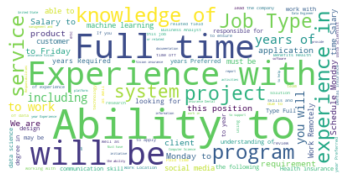

In [82]:
text = " ".join(description for description in salary_df['combined_text'])
#text = salary_df['combined_text'][4]

#Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["to","sex","may"])

wordcloud = WordCloud(stopwords = stopwords,max_font_size=50, max_words=100, background_color='white').generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

"Full time, ability to, experience with, knowledge of".. These words seem to be common in all job descriptions. However, we want to see what skills, specifications data professionals should have, so this view is not very helpful. 

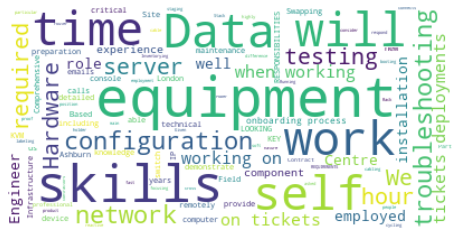

In [90]:
text = salary_df['combined_text'][10]

#Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["to","sex","may","Ability to","Full time","Experience with", "Job Type"])

wordcloud = WordCloud(stopwords = stopwords,max_font_size=50, max_words=100, background_color='white').generate(text)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

When we look at individual job description, these keywords like data quality, analysis, define pop out. So maybe in the final application, we just pass in individual job description.